In [3]:
from tau_profile_parser import TauProfileParser
import matplotlib
import pandas as pd
import nbformat
import plotly.graph_objs as pgo

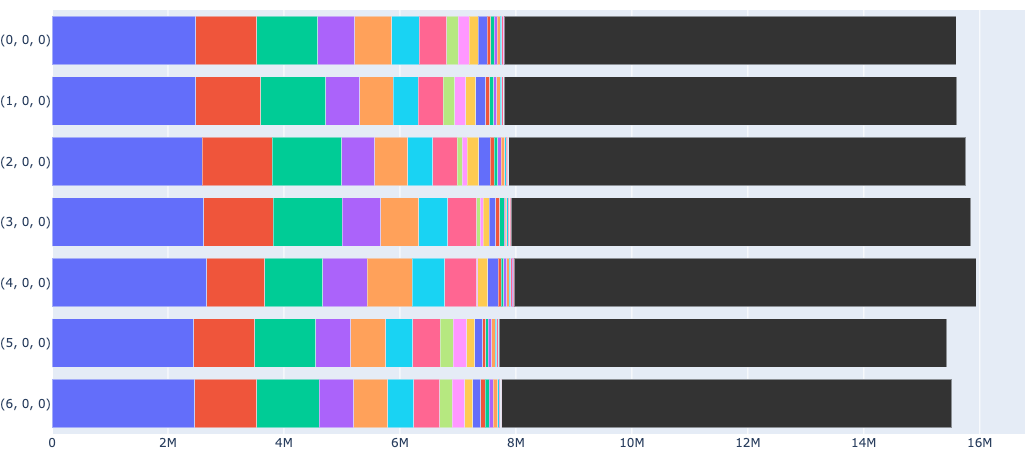

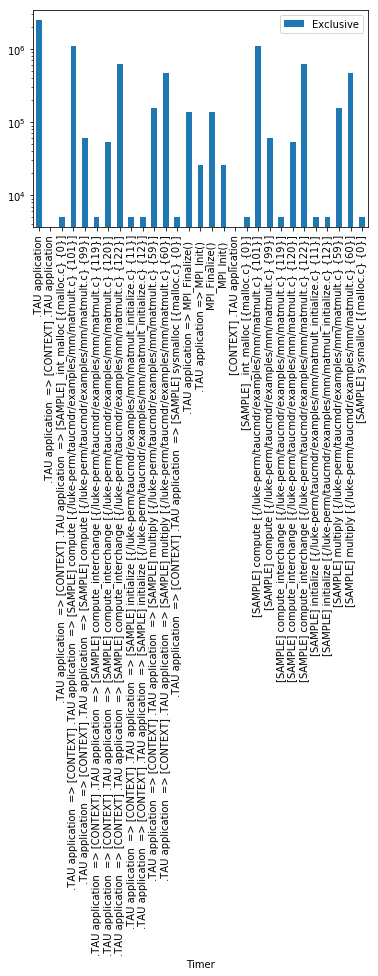

In [4]:
# Trial Bar Plot
profile = TauProfileParser.parse('./mpi-profile-example')
#profile = TauProfileParser.parse('../../nick-profiles')
profile.interval_data().groupby('Timer').agg({'Exclusive': 'mean'}).plot.bar(log = True)

mdata = profile.interval_data()[['Exclusive']]
idata = mdata.unstack().sort_values((0, 0, 0), axis = 1, ascending = False).transpose().fillna(0)
df = pd.concat([idata[:100], idata[:100].sum(level = 0).rename({'Exclusive': 'MISC'})], copy = False)
indices = [str(i) for i in df.columns.values]

data = [
    pgo.Bar(
        y = indices[::-1],
        x = r.values[::-1],
        name = idx[1],
        orientation = "h",
        hoverinfo = "text",
        text = [ "<br>".join([idx[1][i:i+75] for i in range(0, len(idx[1]), 75)])] * len(indices)
    ) for idx, r in df.iterrows()]

data[-1]['marker'] = { 'color': '#333333' }

layout = pgo.Layout(
    barmode = 'stack',
    showlegend = False,
    hovermode = 'closest',
    margin = pgo.layout.Margin(l = 0, r = 0, b = 0, t = 10))

pgo.Figure(data = data, layout = layout)

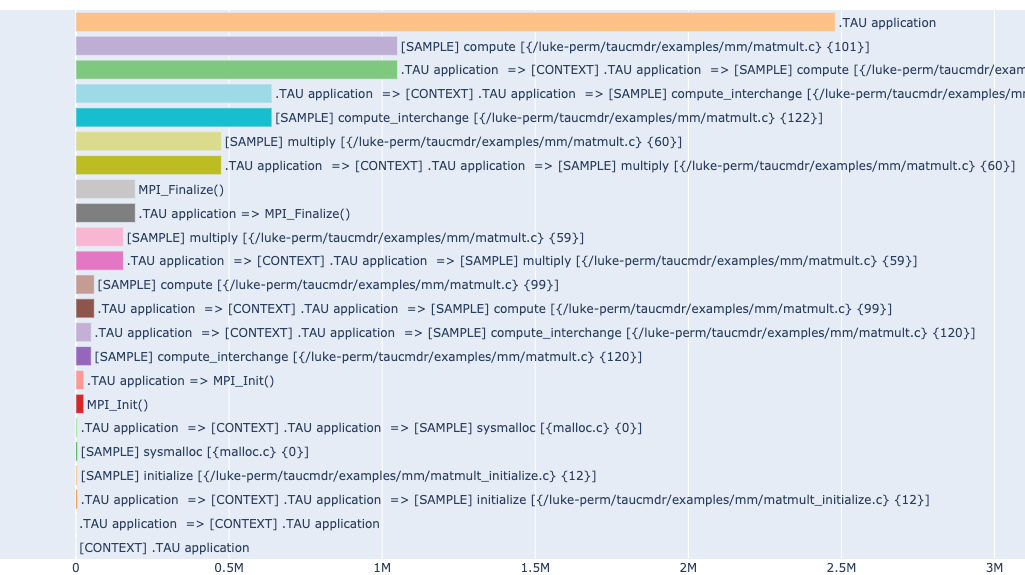

In [5]:
# Profile Bar Plot
colors_str = "#1f77b4,#aec7e8,#ff7f0e,#ffbb78,#2ca02c,#98df8a,#d62728,#ff9896,#9467bd,#c5b0d5,#8c564b,#c49c94,#e377c2,#f7b6d2,#7f7f7f,#c7c7c7,#bcbd22,#dbdb8d,#17becf,#9edae5,#7fc97f,#beaed4,#fdc086,#ffff99,#386cb0,#f0027f,#bf5b17,#666666,#1b9e77,#d95f02,#7570b3,#e7298a,#66a61e,#e6ab02,#a6761d,#666666,#fbb4ae,#b3cde3,#ccebc5,#decbe4,#fed9a6,#ffffcc,#e5d8bd,#fddaec,#f2f2f2,#393b79,#5254a3,#6b6ecf,#9c9ede,#637939,#8ca252,#b5cf6b,#cedb9c,#8c6d31,#bd9e39,#e7ba52,#e7cb94,#843c39,#ad494a,#d6616b,#e7969c,#7b4173,#a55194,#ce6dbd,#de9ed6,#8dd3c7,#ffffb3,#bebada,#fb8072,#80b1d3,#fdb462,#b3de69,#fccde5,#d9d9d9,#bc80bd,#ccebc5,#ffed6f,#3182bd,#6baed6,#9ecae1,#c6dbef,#e6550d,#fd8d3c,#fdae6b,#fdd0a2,#31a354,#74c476,#a1d99b,#c7e9c0,#756bb1,#9e9ac8,#bcbddc,#dadaeb,#636363,#969696,#bdbdbd,#d9d9d9"
colors = colors_str.split(',')

indices = (0, 0, 0)
metric = 'Exclusive'

profile = TauProfileParser.parse('mpi-profile-example')
idata = profile.interval_data()

ds = idata.loc[indices][[metric]].sort_values(metric)
maxval = ds[metric].max()
nrows = ds.shape[0]

data = [
    pgo.Bar(
        x = ds[metric],
        y = ds.index.values,
        orientation = 'h',
        marker = dict(color = colors[:nrows]),
        text = ds.index.values,
        textposition = 'outside'
    )]

layout = pgo.Layout(
    autosize = True,
    height = 25 * nrows,
    margin = pgo.layout.Margin(l = 0, r = 0, b = 0, t = 10),
    xaxis = dict(range = (maxval * -0.1, maxval * 1.25)))

pgo.Figure(data = data, layout = layout)

In [4]:
# Runtime Breakdown Plot
metric = "Exclusive"

profile_sums = []

profile = TauProfileParser.parse('mpi-profile-example')
idata = profile.interval_data()
mdata = idata[[metric]].unstack()
num_cores = mdata.shape[0]
profile_sum = mdata.sum(level = 1).transpose().rename(columns = {0: num_cores})
profile_sums.append(profile_sum)

timer_by_cores = pd.concat(profile_sums, axis = 1).sort_values(1, axis = 0, ascending = False).loc[metric]

KeyError: 1